In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
house_df = pd.read_csv("../votebuilder_model/house_features.csv",header=None, names=['Feature', 'Significance'], index_col=0)
house_df

,Significance
Feature,
Dem_4_of_4,1.035306e-12
Rep_4_of_4,8.650359e-40
Dem_Caucasian_high,6.227484e-07
Rep_Caucasian_high,3.533721e-103
Dem_Male.1,3.778192e-90
Dem_Female.1,5.894933e-57
Estimate; SEX AND AGE - 25 to 34 years,3.474690e-70
Estimate; SEX AND AGE - 35 to 44 years,3.895743e-06
Estimate; SEX AND AGE - 45 to 54 years,1.879087e-06


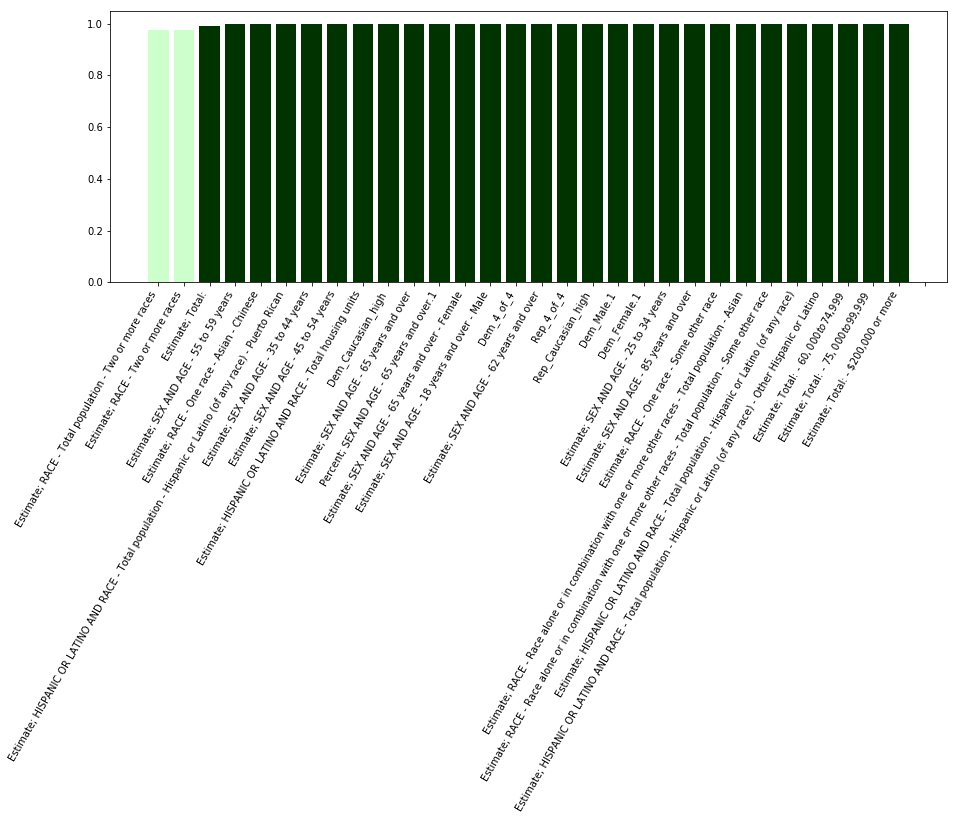

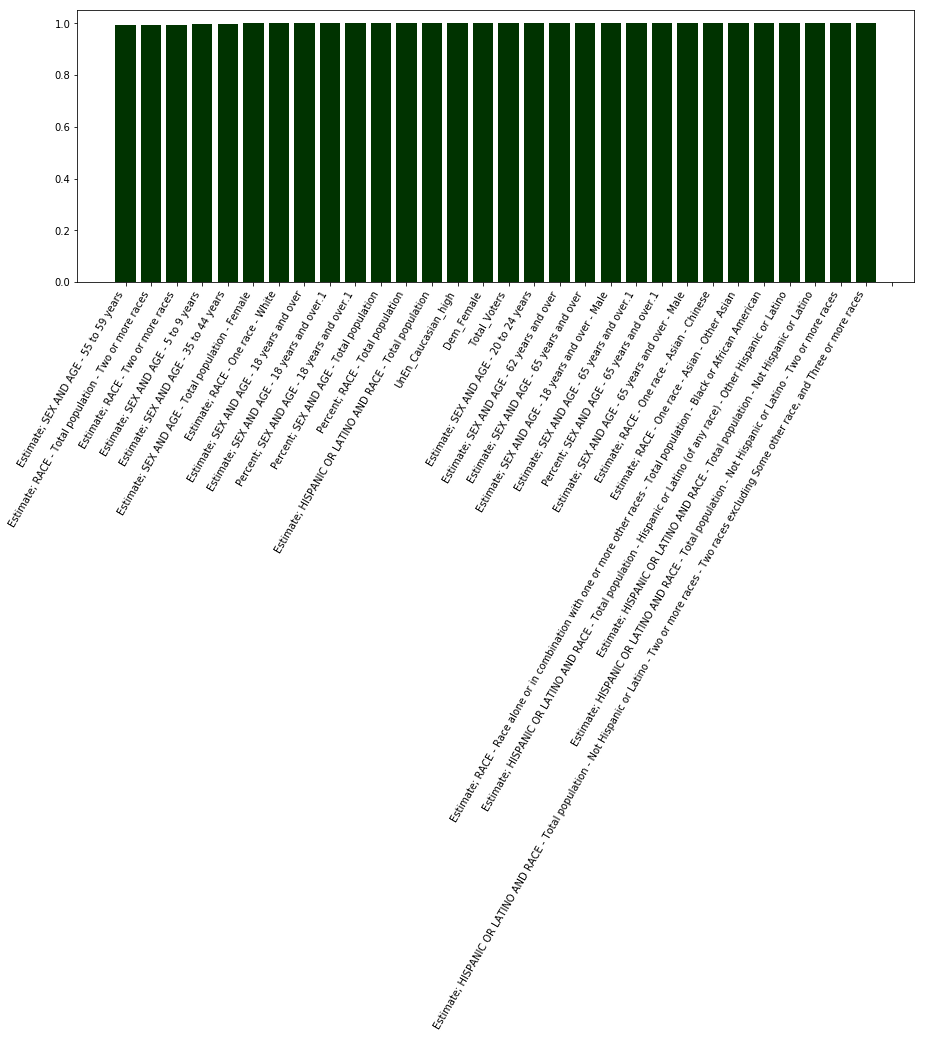

In [4]:
house_df['Significance'] = house_df['Significance'].apply(lambda x: 1-x)
house_feature_dict = house_df.to_dict()['Significance']

senate_df = pd.read_csv("../votebuilder_model/senate_features.csv",header=None, names=['Feature', 'Significance'], index_col=0)
senate_df['Significance'] = senate_df['Significance'].apply(lambda x: 1-x)
senate_feature_dict = senate_df.to_dict()['Significance']

senate_features = list(house_feature_dict.items())
house_features = list(senate_feature_dict.items())

def plot_frequencies(features, type):
    features.sort(key=lambda x: x[1])
    feature_names = [x[0] for x in features]
    coef = [x[1] for x in features]
    top_features = int(len(features) / 2)
    
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['#003300' if c > .99 else '#ccffcc' for c in coef]
    plt.bar(np.arange(2 * top_features), coef, color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1 + 2 * top_features), feature_names, rotation=60, ha='right')
    plt.savefig('results/'+ type +'_feature_chart.png')
    plt.show()

plot_frequencies(senate_features, "Senate")
plot_frequencies(house_features, "House")